In [236]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

***QUESTÃO 01***

In [237]:
df = np.genfromtxt("artificial1d.csv", delimiter=",")

#print(df)

In [238]:
X_ = df[:,:-1]
X = np.c_[np.ones(df.shape[0]), X_]
y = df[:,-1]

#print("primeiro \n", X_)
#print("segundo \n", X)
#print("terceiro \n", y)

**ITEM (A)**

OLS (mínimos quadrados ordinários)


In [239]:
def OLS(X, y):
  return np.linalg.solve(X.T @ X, X.T @ y)

In [240]:
def MSE(y_chapeu, y):
  errors = (y_chapeu - y) ** 2
  return np.mean(errors)

In [241]:
w = OLS(X, y)

print(w)

[0.06761792 1.57486517]


In [242]:
y_chapeu = X @ w
mse = MSE(y_chapeu, y)

print(mse)

0.21340090132936992


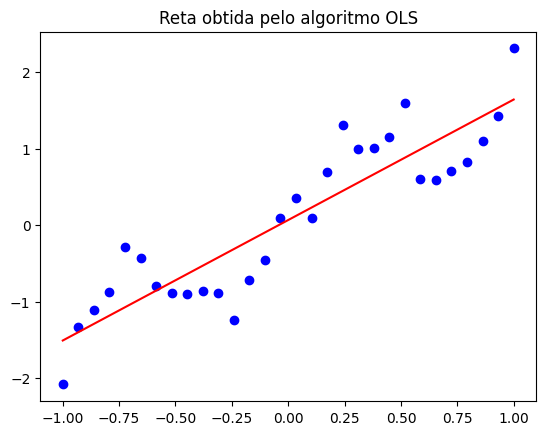

In [243]:
x = np.linspace(-1, 1)
plt.title('Reta obtida pelo algoritmo OLS')
plt.plot(X_, y, 'ob')
plt.plot(x, w[0] + w[1] * x, 'r')

**ITEM (B)**

GD (gradiente descendente)

In [244]:
def GD(X, y, alpha=0.01, epochs=1000):
  n, m = X.shape
  w = np.zeros(m)
  y_chapeu = np.zeros(n)
  custos = []
  for i in range(0, epochs):
    y_chapeu = X @ w
    e = y - y_chapeu
    w = w + alpha * (1 / n) * (e @ X)
    mse = MSE(y_chapeu, y)
    custos.append(mse)
  return w, custos

In [245]:
n_epochs = 1000
w2, custos = GD(X, y, epochs=n_epochs)
w2

array([0.06761501, 1.53050495])

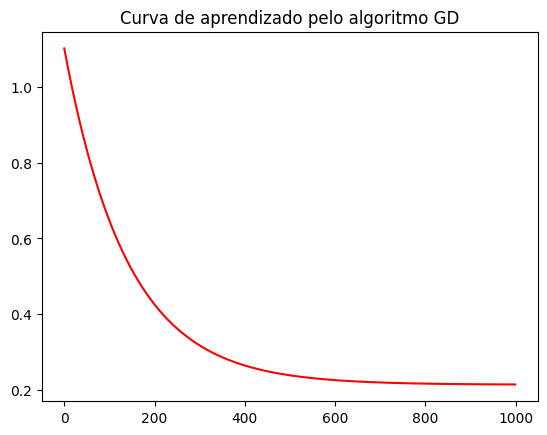

In [246]:
x3 = list(range(n_epochs))
plt.title('Curva de aprendizado pelo algoritmo GD')
plt.plot(x3, custos, 'r')

In [247]:
y_chapeu2 = X @ w2
mse2 = MSE(y_chapeu2, y)
print(mse2)

0.21410208189106827


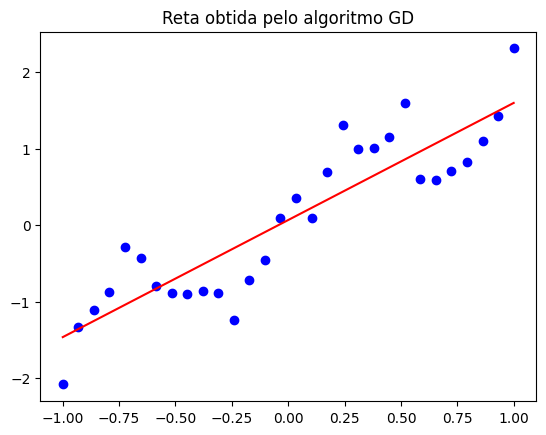

In [248]:
x2 = np.linspace(-1, 1)
plt.title('Reta obtida pelo algoritmo GD')
plt.plot(X_, y, 'ob')
plt.plot(x2, w2[0] + w2[1] * x2, 'r')

**ITEM (C)**

SGD (gradiente descendente estocástico)

In [249]:
def shuffle(X, y):
  data = np.c_ [ X, y ]
  np.random.shuffle(data)
  X = data[:,:-1]
  y = data[:,-1]
  return X, y

In [250]:
def SGD(X, y, alpha=0.01, epochs=1000):
  n, m = X.shape
  w = np.zeros(m)
  y_chapeu = np.zeros(n)
  custos = []
  for _ in range(0, epochs):
    X, y = shuffle(X, y)
    i = np.random.randint(0, n)
    y_i_hat = X[i] @ w
    e = y[i] - y_i_hat
    w = w + alpha * (e * X[i])
    y_chapeu = X @ w
    mse = MSE(y_chapeu, y)
    custos.append(mse)
  return w, custos

In [251]:
w3, custos2 = SGD(X, y, epochs=n_epochs)
print(w3)

[0.12101005 1.57967614]


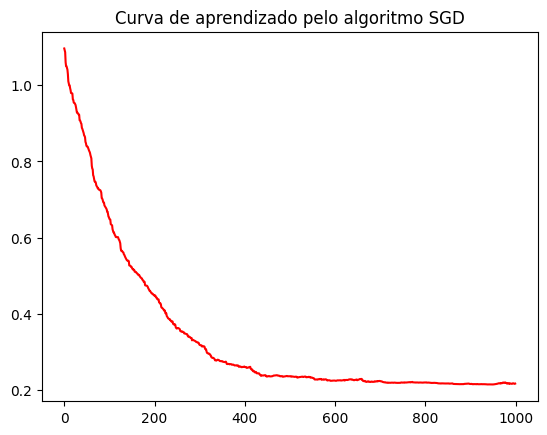

In [252]:
x5 = list(range(n_epochs))
plt.title('Curva de aprendizado pelo algoritmo SGD')
plt.plot(x5, custos2, 'r')

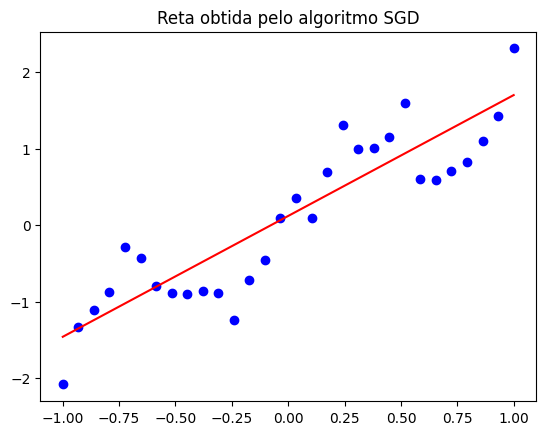

In [253]:
x4 = np.linspace(-1, 1)
plt.title('Reta obtida pelo algoritmo SGD')
plt.plot(X_, y, 'ob')
plt.plot(x4, w3[0] + w3[1] * x4, 'r')

***QUESTÃO 02***

**ITEM (A)**

Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%)

In [254]:
df = np.genfromtxt("california.csv", delimiter=",")

X = df[:,:-1]
y = df[:,[-1]]

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

**ITEM (B)**

Treine 13 modelos de regressão polinomial, com ordens de 1 a 13

In [256]:
class PolynomialRegression():
  def __init__(self, order=1, param_reg=0.01):
    self.order = order
    self.param_reg = param_reg
    self.X_min = 0
    self.y_min = 0
    self.X_max = 0
    self.y_max = 0
  
  def add_bias(self, X):
    n = X.shape[0]
    return np.c_[np.ones(n), X]
  
  def polynomial_features_transform(self, X):
    m = X.shape[1]
    for c in range(m-1, -1, -1):
      col = X[:,c]
      for i in range(self.order, 1, -1):
        X = np.insert(X, c + 1, col ** i, axis=1)
    return X
  
  def ols_polynomial(self):
    X = self.X_biased
    m = X.shape[1]
    I = np.eye(m)
    noise = I * 10 ** -10
    reg = I * self.param_reg
    reg[(0,0)] = 0
    if not self.param_reg:
      self.w = np.linalg.solve(X.T @ X + self.param_reg * I + noise, X.T @ self.y_norm)
    else:
      self.w = np.linalg.solve(X.T @ X + reg, X.T @ self.y_norm)

  def gd_polynomial(self, num_epochs=100, alfa=0.01):  
    n, m = self.X_biased.shape
    w = np.zeros((m, 1))

    for epoch in range(num_epochs):
      error = self.y_norm - self.X_biased @ w
      w = w + alfa * ((self.X_biased.T @ error) / n - self.param_reg * w)
      
    self.w = w

  def get_data_normalized(self):
    self.X_norm = self.get_normalized(self.X_trans, self.X_min, self.X_max)
    self.y_norm = self.get_normalized(self.y, self.y_min, self.y_max)

  def get_normalized(self, X, min, max):
    return (X - min) / (max - min)

  def get_unnormalized(self, X, min, max):
    return X * (max - min) + min

  def pre_fit(self, X, y):
    self.X = X
    self.y = y
    self.X_trans = self.polynomial_features_transform(X)
    self.X_min = self.X_trans.min(axis=0)
    self.y_min = y.min(axis=0)
    self.X_max = self.X_trans.max(axis=0)
    self.y_max = y.max(axis=0)
    self.get_data_normalized()
    self.X_biased = self.add_bias(self.X_norm)

  def fit_gd(self, X, y, num_epochs=200, alfa=0.05):
    self.pre_fit(X, y)
    self.gd_polynomial(num_epochs = num_epochs, alfa=alfa)

  def fit_ols(self, X, y):
    self.pre_fit(X, y)
    self.ols_polynomial()

  def predict(self, X):
    X_trans = self.polynomial_features_transform(X)
    X_norm = self.get_normalized(X_trans, self.X_min, self.X_max)
    X_biased = self.add_bias(X_norm)
    y_pred = X_biased @ self.w
    return self.get_unnormalized(y_pred, self.y_min, self.y_max)

In [257]:
def build_models(orders=[1], param_reg=0.01, alg='ols'):
  models = []
  for order in orders:
    polyreg = PolynomialRegression(order = order, param_reg = param_reg)

    if alg == 'ols':
      polyreg.fit_ols(X_train, y_train)
    elif alg == 'gd':
      polyreg.fit_gd(X_train, y_train, num_epochs=2000, alfa=0.001)

    models.append(polyreg)

  return models

In [258]:
max_order = 13
orders = list(range(1, max_order + 1))

In [259]:
param_reg = 0
ols_models = build_models(orders = orders, param_reg = param_reg)

**ITEM (C)**

Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento
e no teste para **cada** modelo. 

In [260]:
def RMSE(y, y_pred):
  errors = (y_pred - y) ** 2
  return np.sqrt(np.mean(errors))

In [261]:
def get_rmses(models, X_train, y_train, X_test, y_test):
  rmses = []

  for model in models:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train = RMSE(y_train, y_train_pred)
    rmse_test = RMSE(y_test, y_test_pred)

    rmses.append({
      'train': rmse_train,
      'test': rmse_test
    })

  return rmses

In [262]:
ols_rmses = get_rmses(ols_models, X_train, y_train, X_test, y_test)

In [263]:
def plot_rmses(orders, param_reg, ols_rmses):
  plt.title('Curvas de RMSE obtida com OLS [Parâmetro de regularização = {}]'.format(param_reg))
  plt.plot(orders, [m['train'] for m in ols_rmses], 'r', label='Treino')
  plt.plot(orders, [m['test'] for m in ols_rmses], 'b', label='Teste')
  plt.legend()

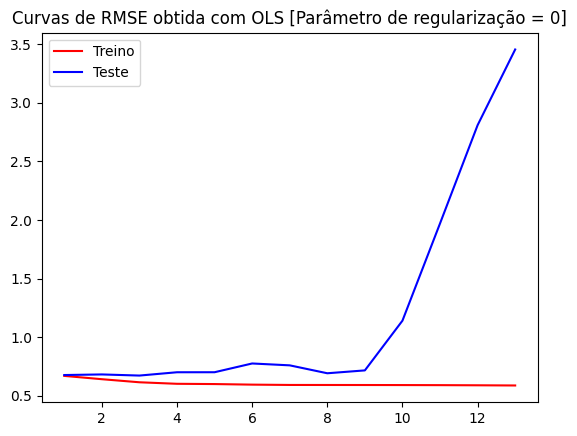

In [264]:
plot_rmses(orders, param_reg, ols_rmses)

In [265]:
ols_rmse, best_order_ols = min([(rmse['test'], i + 1) for (i, rmse) in enumerate(ols_rmses)])
print("Melhor ordem para o polinômio de teste com OLS: {}".format(best_order_ols))
print("RMSE com OLS: {}".format(ols_rmse))

Melhor ordem para o polinômio de teste com OLS: 3
RMSE com OLS: 0.6727588364686891


**ITEM (D)**

Repita os 2 itens anteriores incluindo um termo de regularização L2


In [266]:
param_reg = 0.01
ols_models = build_models(orders = orders, param_reg = param_reg)
ols_rmses = get_rmses(ols_models, X_train, y_train, X_test, y_test)

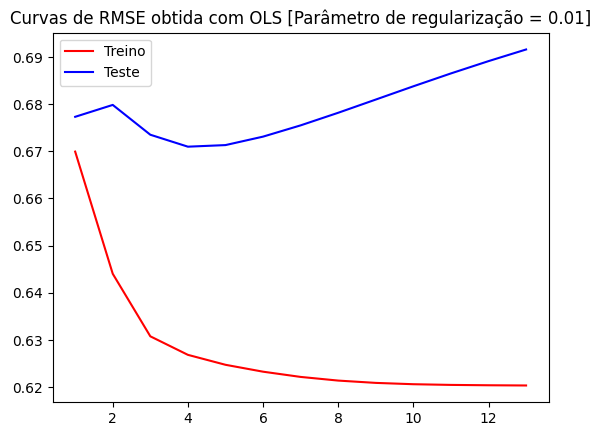

In [267]:
plot_rmses(orders, param_reg, ols_rmses)

In [268]:
ols_rmse, best_order_ols = min([(rmse['test'], i + 1) for (i, rmse) in enumerate(ols_rmses)])
print("Melhor ordem para o polinômio de teste com OLS: {}".format(best_order_ols))
print("RMSE com OLS: {}".format(ols_rmse))

Melhor ordem para o polinômio de teste com OLS: 4
RMSE com OLS: 0.6709634557223836
